Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb)

---

# 03 - Testat zu Scikit-learn (sklearn)
__Gruppennummer:__ 4

__Mitglieder:__
- Pia Kastner
- Lars Kölker
- Stefan Gerber
- Marvin Berndt

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

In diesem Testat werden Sie die unterschiedlichen Arbeitsschritte von der Datenvorverarbeitung über die Modell- und Teststrategieauswahl bis hin zur Evaluierung mit Hilfe von Scikit-learn durchführen. Dabei verwenden wir eine leicht modifizierte Variante des [California Housing Datasets](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). Dieses enthält die folgenden _acht_ Merkmale:
- __MedInc:__ Das mittlere Einkommen im Block
- __HouseAge:__ Das mittlere Hausalter im Block
- __AveRooms:__ Die durchschnittliche Raumanzahl pro Haushalt im Block
- __AveBedrms:__ Die durchschnittliche Schlafzimmeranzahl pro Haushalt im Block
- __Population:__ Die Bevölkerunganzahl im Block
- __AveOccup:__ Die durchschnittliche Anzahl von Personen pro Haushalt im Block
- __Latitude:__ Der Breitengrad des Blocks
- __Longitude:__ Der Längengrad des Blocks

Jedem Datenpunkt ist genau einer Klasse (_low_, _mid-low_, _mid_, _mid-high_, _high_) zugeordnet, die angibt, wie hoch der mittlere Hauswert im Block ist. Jede Klasse enthält ~20% der Datenpunkte.

## Aufgabe 0 - Data Understanding
__unbenotet__

Laden Sie die Daten und machen Sie sich mit ihnen vertraut. 

In [3]:
# Daten einlesen
housing_df = pd.read_csv('california_housing_data.csv')
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,high
1,1.3578,40.0,4.524096,NaN,409.0,2.463855,37.85,-122.27,mid-low
2,2.0978,52.0,4.215190,1.060759,946.0,2.394937,37.83,-122.26,mid-low
3,3.3929,NaN,5.994652,1.128342,554.0,2.962567,37.83,-122.29,low
4,NaN,17.0,3.197232,1.000000,609.0,2.107266,37.81,-122.28,mid
...,...,...,...,...,...,...,...,...,...
1027,3.1908,16.0,4.386792,0.981132,1386.0,2.179245,38.54,-121.72,mid
1028,NaN,38.0,6.408696,1.039130,1123.0,2.441304,38.67,-121.78,mid-low
1029,2.8365,32.0,5.371901,1.060606,1145.0,3.154270,38.76,-121.77,low
1030,3.1029,18.0,4.945455,1.112121,769.0,2.330303,NaN,-121.57,low


Eventuell hilft Ihnen auch der folgende Graph.

In [11]:
# Theme setzen
sns.set_theme(style="whitegrid")
# Plotten
sns.pairplot(housing_df, hue="Label")

AttributeError: module 'seaborn' has no attribute 'set_theme'

## Aufgabe 1 - Data Preparation (4 Punkte)
Die erste Aufgabe ist es den Datensatz fürs maschinelle Lernen vorzubereiten. Dazu sind die folgenden Schritte nötig:
- a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
- b) Auswahl der Strategie(n) zur Skalierung der Daten
- c) Erstellen der Preparation-Pipeline

Da das Ersetzen der fehlenden Werte und die Skalierung der Daten in einer `Pipeline` passieren soll, können Sie nur Algorithmen verwenden, die __sklearn__ bereitstellt.

_Hinweise/Tipps:_ 
- Sie müssen die unterschiedlichen Algorithmen nicht (bis zum Maximum) optimieren, hier geht es gerade eher darum zu überprüfen, ob Sie die Algorithmen generell verstanden haben und Sie richtig einsetzen/kombinieren können.
- Gucken Sie sich nochmal die besprochenen Algorithmen an und überlegen wo die Stärken und Schwächen liegen.
- Sie können selbstverständlich auch unterschiedliche Methoden für die einzelnen Merkmale wählen.  

### a) Auswahl der Strategie(n) zum Ersetzen der fehlenden Werte
_Punkte: 1_

Als erstes müssen Sie sich eine Strategie zum Ersetzen der fehlenden Werte überlegen. Beschreiben Sie diese in der nachfolgenden Markdown-Zeile und begründen Sie, warum Sie diese Strategie gewählt haben. 

__Ihre Antwort:__

Für das Ersetzen der Werte (Imputation) haben wir uns für eine mehrdimensionale Imputation entschieden. Bei der mehrdimensionalen Imputation wird jeder fehlende Wert als Funktion anderer Merkmale modelliert und diese Schätzung dann zur Imputation verwendet. Im Vergleich zu der eindimensionalen Imputation haben die Spalten bei der mehrdimensionalen Imputation einen Bezug zueinander. Dies liegt auch in diesem Datensatz vor, da die ersten 6 und die letzte Spalte einen Bezug zueinander haben. Bei den Spalten "Latitude" und "Longitude" können einen Bezug zueinander haben, da es bspw. wohlhabenere Wohnsiedlungen und weniger wohlhabenere Wohnsiedlungen geben kann.


### b) Auswahl der Strategie(n) zur Skalierung der Daten
_Punkte: 1_

Außerdem sollten die Daten skaliert/normalisiert werden. Beschreiben Sie Ihre Strategie und begründen Sie warum Sie diese Strategie bzw. Methoden gewählt haben.

__Ihre Antwort:__

Bei der Skalierung der Daten haben wir uns für die Skalierung entschieden, da die Skalierung gerade bei unterschiedlich skalierten Variablen hilfreich ist. In diesem Datensatz sind viele Spalten sehr unterschiedlich skaliert (wie bspw. "HouseAge" und "Population").



### c) Erstellen der Preparation-Pipeline
_Punkte: 2_

In der nächsten Codezeile können Sie nun die `preparation_pipeline` erstellen. In dieser sollen beide vorherigen Schritte enthalten sein. Sie müssen die Pipeline aber noch nicht "trainieren" (Aufruf der Methode `fit()`).

In [12]:
from sklearn.pipeline import Pipeline 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

### BEGIN SOLUTION
# Pipeline erstellen mit einem IterativeImputer und StandardScaler
preparation_pipeline = Pipeline([
    ("imputer", IterativeImputer()),
    ("scaler", StandardScaler())
]) 
### END SOLUTION

Warum macht es noch keinen Sinn die Pipeline jetzt schon zu trainieren?

__Ihre Antwort:__
- Wir haben noch keine separaten Trainings- und Testdatensets und daher würden wir Testdaten zum Training verwenden.


## Aufgabe 2 - Trainingsvorbereitung und Modellauswahl  (4 Punkte)
Ihre nächste Aufgabe ist es das Training vorzubereiten und den richtigen ML-Algorithmus auszuwählen. Dafür müssen Sie die folgenden Teilaufgaben erledigen:
- a) Erstellen des Test- und Trainingsdatenset
- b) Kreuzvalidierung im Trainingsprozess
- c) Optimieren eines ML-Algorithmus
- d) Testen der trainierten Pipeline

### a) Erstellen des Test- und Trainingsdatenset
_Punkte: 0,5_

Zuerst benötigen wir ein Test- und ein Trainingsdatenset. Das Testdatenset soll 30% der gesamten Daten enthalten. 

In [13]:
# get the data and target from the data frame 
data = housing_df.loc[:, :'Longitude']
target = housing_df['Label']

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
#train_test_split teilt die Daten in Test- und Trainingsdaten im Verhältnis 30/70 auf
train_data, test_data, train_label, test_label = train_test_split(data,target,test_size = 0.3)
### END SOLUTION

### b) Kreuzvalidierung im Trainingsprozess
_Punkte: 1_

Was ist unter Kreuzvalidierung im Trainingsprozess zu verstehen und wieso wird es verwendet?

__Ihre Antwort:__

- Während des Trainings müssen unterschiedliche Hyperparameter optimiert werden.
- Um die optimalen Parameter auswählen zu können, muss auch getestet werden.
- Daher wird ein weiteres Datenset benötigt, das sogenannte Validierungsdatenset.
- Da dadurch die Daten fürs Training weiter schrumpfen, wurde die Kreuzvalidierung erfunden.
- Splitten der Trainingsdaten in  𝑘
  Subsets. Das Netzwerk  𝑘
  mal trainieren und dabei immer mit dem  𝑘 ten Subset testen. Durchschnitt der Testergebnisse ist Gesamtergebnis für eine bestimmte Hyperparameterkombination.


### c) Optimieren eines ML-Algorithmus
_Punkte: 1,5_

Im nächsten Schritt optimieren wir einen ML-Algorithmus. Da wir ein Klassifikationsproblem lösen wollen, kommen nur Klassifikationsalgorithmen als mögliche Algorithmen in Frage. Wir werden den [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) verwenden. 

Der `RandomForestClassifier` soll eine maximale Tiefe von 6 haben und maximal 75% der Daten pro Baum verwenden. Setzen Sie den `random_state` auf 0. Für die Anzahl der Bäume sollen die folgenden Werte überprüft werden: `[30, 40, 50, 60, 70, 80]`. Außerdem sollen die beiden Möglichkeiten `['gini', 'entropy']` für das Kriterium, nach dem geteilt wird, getestet werden.

Führen Sie die folgenden Schritte durch:
- Erstellen Sie eine Pipeline, die zuerst die vorher bereits erstellte Vorverarbeitung durchführt und anschließend den `RandomForestClassifier` aufruft. 
- Finden Sie die optimalen Parameter aus den angegebenen Parameterbereichen.
- Speichern Sie die `Pipeline` mit den besten Parametern in der Variable `trained_pipeline`
- Geben Sie die beste `Pipeline` aus

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Hier können Sie weitere benötigte Importe hinzufügen

### BEGIN SOLUTION
# Pipeline erneut erstellen mit RandomForestClassifier als weiteren Parameter erstellen
pipeline = Pipeline([
    ("imputer", IterativeImputer()),
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(max_depth = 6, # Maximale Tiefe auf 6 begrenzen
                                         max_samples = 0.75, # Maximale Daten pro Baum auf 75% begrenzen
                                         random_state = 0 # Um den Seed festzulegen mit dem trainiert wird
                                         ))
]) 
### END SOLUTION

In [17]:
# Erstellen des GridSearch, um beste Pipeline anhand der Parameter n_estimator und criterion zu analysieren
model = GridSearchCV(estimator=pipeline,
                     param_grid={
                         'classifier__n_estimators' : [30, 40, 50, 60, 70, 80],
                         'classifier__criterion':['gini', 'entropy']                         
                     }
)

In [18]:
# Alle Pipelines mit den Trainingsdaten trainieren
model.fit(train_data, train_label)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        IterativeImputer(add_indicator=False,
                                                         estimator=None,
                                                         imputation_order='ascending',
                                                         initial_strategy='mean',
                                                         max_iter=10,
                                                         max_value=None,
                                                         min_value=None,
                                                         missing_values=nan,
                                                         n_nearest_features=None,
                                                         random_state=None,
                                                         sample_posterior=False,
             

In [22]:
# Ausgabe des besten Estimators
trained_pipeline = model.best_estimator_

trained_pipeline

Pipeline(memory=None,
         steps=[('imputer',
                 IterativeImputer(add_indicator=False, estimator=None,
                                  imputation_order='ascending',
                                  initial_strategy='mean', max_iter=10,
                                  max_value=None, min_value=None,
                                  missing_values=nan, n_nearest_features=None,
                                  random_state=None, sample_posterior=False,
                                  skip_complete=False, tol=0.001, verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, wit...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=6, max_features='auto',
                                        max_leaf_nodes=None, max_samples=0.75,
                                        min_impurity_decrease

### d) Testen der trainierten Pipeline
_Punkte: 1_

Nachdem Sie die `Pipeline` trainiert haben, ist es nun Zeit diese zu testen. Lassen Sie sich dafür den Score einmal für das Test- und einmal für das Trainingsdatenset berechnen. Was fällt auf? Welche Metrik wird für das berechnen verwendet bzw. was sagt sie aus? Ist diese Metrik hier sinnvoll?

In [23]:
### BEGIN SOLUTION
from sklearn.metrics import accuracy_score

# Predictions berechnen mit der trainierten Pipeline
train_predict = trained_pipeline.predict(train_data)
test_predict = trained_pipeline.predict(test_data)

# Ausgabe der Genaugikeit
print(accuracy_score(y_true = train_label, y_pred = train_predict))
print(accuracy_score(y_true = test_label, y_pred = test_predict))

### END SOLUTION

0.8379501385041551
0.5032258064516129


__Ihre Antwort:__

Die Trainingsdaten passen zu 80% auf die Trainingslabel. Bei den Trainingsdaten ist es zu erwarten, weil wir es damit trainiert haben. Die Testdaten kennt er noch nicht, deshalb gibt es hier nur eine Genauigkeit von 50%. Es ist dabei zu beachten, dass diese Zahlen nur angeben, wie wahrscheinlich es ist, ob unsere Pipeline zu 100% das richtige Label trifft. Wenn die Pipeline als Label "low-mid" ausgeben hat, aber der wahre Wert "mid" ist, dann wird nicht beachtet, dass der Wert näher dran ist, als z.B. "low" und "high".


## Aufgabe 3 - Weitere Evaluierung und Visualisierung (2 Punkte)
Im letzten Schritt wollen wir uns die Ergebnisse noch einmal genauer angucken, um eventuell zu verstehen, was passiert ist. Dazu sind die folgenden Teilaufgaben zu erledigen:
- a) Erstellen eines Confusion Matrix-Diagramms
- b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis

### a) Erstellen eines Confusion Matrix-Diagramms
_Punkte: 1_

Erstellen Sie mit Hilfe der `plot_confusion_matrix`-Funktion das Diagramm der Confusion Matrix. Analysieren Sie dieses anschließend.

_Tipps:_
- Welche Klassen wurden falsch klassifiziert?
- Was könnten mögliche Gründe dafür sein?

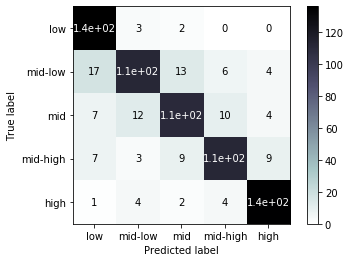

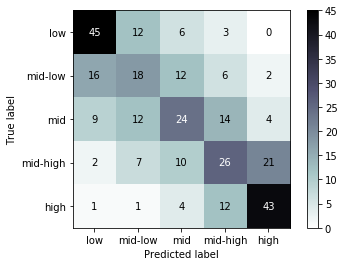

In [24]:
from sklearn.metrics import plot_confusion_matrix

### BEGIN SOLUTION
plot_confusion_matrix(estimator=trained_pipeline, # Trainierte Pipeline
                     X = train_data, # Trainingsdaten
                     y_true = train_label,
                     labels = ['low', 'mid-low', 'mid', 'mid-high', 'high'], # Labelsortierung überschreiben
                     cmap = "bone_r"
                     )

plot_confusion_matrix(estimator=trained_pipeline, # Trainierte Pipeline
                     X = test_data, # Testdaten
                     y_true = test_label,
                     labels = ['low', 'mid-low', 'mid', 'mid-high', 'high'], # Labelsortierung überschreiben
                     cmap = "bone_r"
                     )
### END SOLUTION

__Ihre Antwort:__

Bei den trainierten Daten ist eine klare Tendenz zu den richtigen Werten zu sehen (geringe Streuung). Bei den Testdaten ist die Streuung deutlich höher. Im Gegensatz zu den Accuray-Werten ist hier zu sehen, dass unsere Pipeline die Werte im richtigen Umfeld trifft.


### b) Analyse des Einfluss des Parameters n_estimators auf das Ergebnis
_Punkte: 1_

Zum Schluss wollen wir noch einmal analysieren welchen Einfluss der Parameter `n_estimators` auf das Trainingsergebnis hat. Verwenden Sie dafür die Funktion `validation_curve`, um für den getesteten Parameterbereich des Parameters die nötigen Daten zu sammeln. Speichern Sie die Rückgabe in den Variablen `train_scores` und `valid_score`. Erstellen Sie außerdem eine Variable `n_estimators`, die alle möglichen Werte für den Parameter enthält. 

Welche Rückschlüsse lässt das Diagramm zu?

In [27]:
from sklearn.model_selection import validation_curve

### BEGIN SOLUTION

# Estimators definieren
n_estimators = [30, 40, 50, 60, 70, 80]

# Validationskurve erstellen
train_scores, valid_scores = validation_curve(estimator=pipeline,
                                            X = train_data,
                                            y = train_label,
                                            param_name = 'classifier__n_estimators',
                                            param_range = n_estimators
                                            )

### END SOLUTION

In [28]:
# Gültige Scores ausgeben
valid_scores

array([[0.54482759, 0.50344828, 0.5       , 0.54166667, 0.49305556],
       [0.55862069, 0.51034483, 0.48611111, 0.52083333, 0.50694444],
       [0.57241379, 0.49655172, 0.51388889, 0.54166667, 0.49305556],
       [0.5862069 , 0.49655172, 0.49305556, 0.52777778, 0.49305556],
       [0.57241379, 0.50344828, 0.52777778, 0.55555556, 0.48611111],
       [0.56551724, 0.50344828, 0.51388889, 0.55555556, 0.47222222]])

In [29]:
# Zu trainierende Scores ausgeben
train_scores

array([[0.79896014, 0.79896014, 0.79238754, 0.79930796, 0.80449827],
       [0.77816291, 0.81282496, 0.80795848, 0.82525952, 0.80276817],
       [0.79202773, 0.81109185, 0.82352941, 0.82352941, 0.80968858],
       [0.81802426, 0.82149047, 0.8200692 , 0.83564014, 0.80449827],
       [0.80242634, 0.83188908, 0.81487889, 0.83910035, 0.80276817],
       [0.81455806, 0.83362218, 0.81487889, 0.84256055, 0.81314879]])

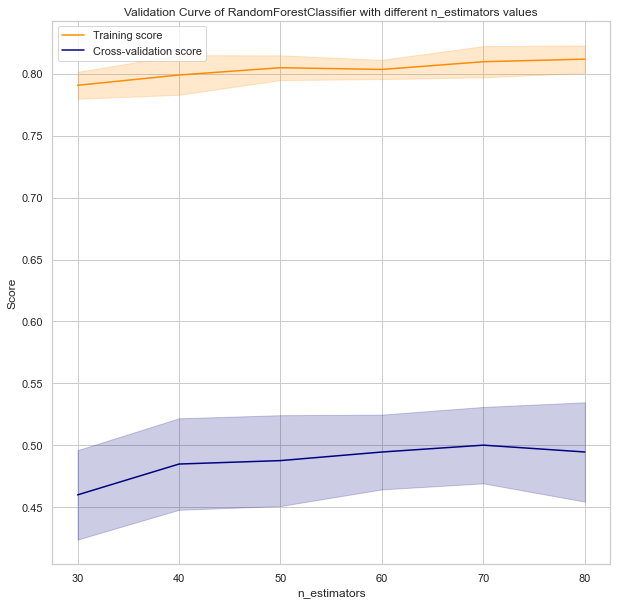

In [16]:
# first, calculate the means and standard deviations
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

# create the figure
plt.figure(figsize=(10, 10))
plt.title("Validation Curve of RandomForestClassifier with different n_estimators values")
plt.xlabel("n_estimators")
plt.ylabel("Score")
# plot the training score
plt.plot(n_estimators, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_estimators, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 color="darkorange",
                 alpha=0.2
                )
# plot the validation score
plt.plot(n_estimators, valid_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(n_estimators, 
                 valid_scores_mean - valid_scores_std, 
                 valid_scores_mean + valid_scores_std, 
                 color="navy",
                 alpha=0.2
                )

plt.legend(loc="best")
plt.show()

__Ihre Antwort:__

Unterschiedliche Estimator weisen unterschiedliche Standardabweichungen auf. Der Estimator mit der geringsten Standardabweichung wurde auch als beste Pipeline gekennzeichnet. Die Streuungen bei dem unteren Graphen sind deutlich höher.


---

Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb)